### Problem 1

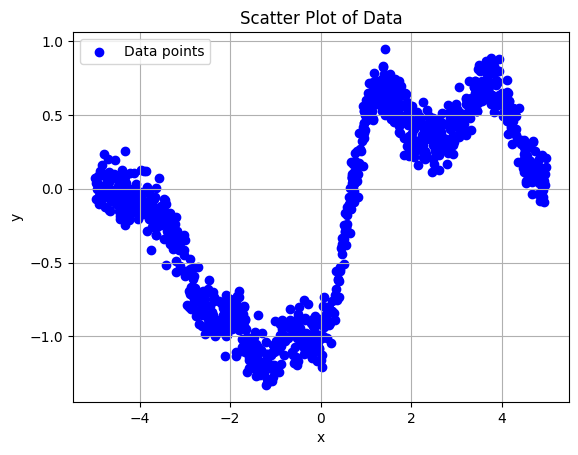

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.load("hw1_p1.npy")
x, y = data[:, 0], data[:, 1]

# Visualize the data
plt.scatter(x, y, color='blue', label="Data points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Data")
plt.grid(True)
plt.legend()
plt.show()


In [30]:
# Define Gaussian basis functions
def gaussian_basis(x, centers, sigma=0.25):
    
    return np.exp(-((x[:, None] - centers[None, :]) ** 2) / (2 * sigma ** 2))

# Define centers and create the feature matrix
M = 7
centers = np.array([1.25 * m - 3.75 for m in range(M)])
sigma = 0.25

Phi = gaussian_basis(x, centers, sigma)

# Verify Phi dimensions
print("Feature matrix Phi shape:", Phi.shape)


Feature matrix Phi shape: (1000, 7)


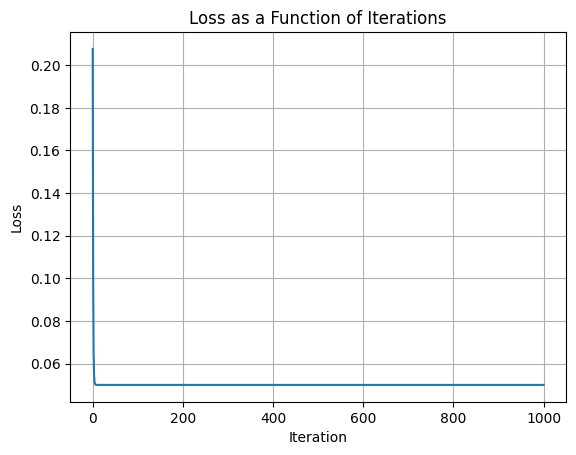

In [31]:
# Mean Squared Error loss
def mse_loss(Phi, w, y):

    residuals = Phi @ w - y
    return 0.5 * np.mean(residuals ** 2)

# Gradient descent implementation
def gradient_descent(Phi, y, w_init, epsilon, num_steps):
    
    w = w_init
    w_history = [w.copy()]
    loss_history = [mse_loss(Phi, w, y)]

    for step in range(num_steps):
        
        gradient = Phi.T @ (Phi @ w - y)

        w = w - epsilon * gradient

        w_history.append(w.copy())
        loss_history.append(mse_loss(Phi, w, y))

    return w_history, loss_history

# Initialize weights
w_init = np.zeros(Phi.shape[1])
epsilon = 0.01
num_steps = 1000

# Run gradient descent
w_history, loss_history = gradient_descent(Phi, y, w_init, epsilon, num_steps)

# Plot the loss over iterations
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss as a Function of Iterations")
plt.grid(True)
plt.show()


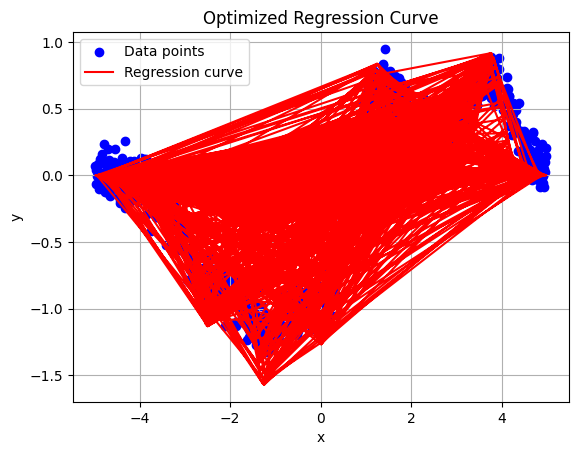

In [32]:
# Optimized weights
w_opt = w_history[-1]  # Last set of weights

# Compute predictions
y_pred = Phi @ w_opt

# Plot the data and regression curve
plt.scatter(x, y, color='blue', label="Data points")
plt.plot(x, y_pred, color='red', label="Regression curve")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Optimized Regression Curve")
plt.grid(True)
plt.show()


In [33]:
# Compute Hessian matrix
H = Phi.T @ Phi  # Hessian is Phi^T Phi

# Eigenvalues of the Hessian
eigenvalues = np.linalg.eigvals(H)
lambda_max = np.max(eigenvalues)  # Maximum eigenvalue
epsilon_upper_bound = 2 / lambda_max

print("Maximum eigenvalue of the Hessian:", lambda_max)
print("Theoretical upper bound for learning rate:", epsilon_upper_bound)


Maximum eigenvalue of the Hessian: 51.920171616338365
Theoretical upper bound for learning rate: 0.0385206739064521


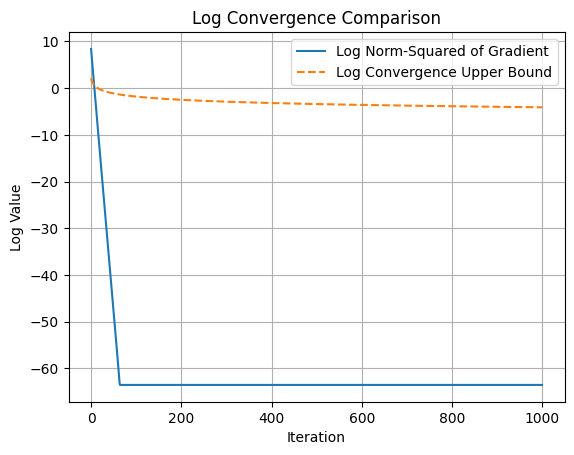

In [34]:
# Compute gradient norms
gradient_norms = [np.linalg.norm(Phi.T @ (Phi @ w - y)) ** 2 for w in w_history]

# Theoretical convergence bound
convergence_bound = [
    2 * lambda_max * (loss_history[0] - loss_history[-1]) / (t + 1)
    for t in range(1, len(loss_history))
]

# Logarithmic convergence plot
plt.plot(np.log(gradient_norms[1:]), label="Log Norm-Squared of Gradient")
plt.plot(np.log(convergence_bound), label="Log Convergence Upper Bound", linestyle="--")
plt.xlabel("Iteration")
plt.ylabel("Log Value")
plt.legend()
plt.title("Log Convergence Comparison")
plt.grid(True)
plt.show()
